In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dus14 = pd.read_csv('DUS2014.csv')
dus18 = pd.read_csv('DUS2018.csv')

In [8]:
d14s = dus14[['lytis','amzius','issilavinimas','bdu_spalio','profesija']]

In [9]:
d18s = dus18[['lytis','amzius','issilavinimas','bdu_spalio','profesija']]

In [10]:
d18s.head()

,lytis,amzius,issilavinimas,bdu_spalio,profesija
0,F,40-49,G2,460,334
1,M,50-59,G2,1487,722
2,M,40-49,G2,1500,721
3,M,50-59,G2,1500,722
4,F,40-49,G2,400,522


In [11]:
# suraskite ir išspausdinkite vidutinius vyrų bei moterų atlyginimus (spalio)
# 2014 ir 2018 metams.

f14 = d14s[d14s['lytis'] == 'F']
m14 = d14s[d14s['lytis'] == 'M']
f18 = d18s[d18s['lytis'] == 'F']
m18 = d18s[d18s['lytis'] == 'M']

f14vid = f14['bdu_spalio'].mean()
m14vid = m14['bdu_spalio'].mean()
f18vid = f18['bdu_spalio'].mean()
m18vid = m18['bdu_spalio'].mean()

print('2014 vyru', m14vid/3.4528, ',', 'moteru', f14vid/3.4528)
print('2018 vyru', m18vid, ',', 'moteru', f18vid)

2014 vyru 762.7704309291468 , moteru 607.4431355450901
2018 vyru 1014.4962626801922 , moteru 832.1469450889405


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
bdu_spalio = d14s['bdu_spalio'].values
bdu_eur = bdu_spalio/3.4528
d14s['bdu€'] = bdu_eur
d14s.head(10)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
0,M,20-29,G4,6.00,261,1.737720
1,F,20-29,G2,6.00,334,1.737720
2,F,40-49,G4,6.00,221,1.737720
3,F,30-39,G4,6.00,332,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
7,F,20-29,G2,13.33,531,3.860635
8,M,20-29,G1,6.67,912,1.931766
9,M,40-49,G2,6.00,332,1.737720


In [18]:
d14s['bdu€'] = d14s['bdu_spalio']/3.4528

In [19]:
# .query()
d14s.query('lytis == "M"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
0,M,20-29,G4,6.00,261,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
8,M,20-29,G1,6.67,912,1.931766
...,...,...,...,...,...,...
44925,M,40-49,G4,7849.67,134,2273.421571
44927,M,30-39,G4,1793.00,231,519.288693
44931,M,50-59,G4,3246.00,232,940.106580
44934,M,60+,G4,3819.67,231,1106.252896


In [20]:
d14s.query('lytis == "M" and issilavinimas == "G3"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
11,M,20-29,G3,9.67,315,2.800626
18,M,60+,G3,6.00,312,1.737720
19,M,20-29,G3,6.00,333,1.737720
21,M,20-29,G3,28.67,241,8.303406
25,M,50-59,G3,6.00,261,1.737720
...,...,...,...,...,...,...
44805,M,40-49,G3,3685.00,233,1067.249768
44808,M,60+,G3,2692.00,235,779.657090
44843,M,20-29,G3,1625.00,235,470.632530
44914,M,40-49,G3,3444.33,234,997.546918


In [31]:
edu =input('Iveskite issilavinimo kda(G1, G2, G3, G4)')
ats = d14s.query('issilavinimas == @edu')  # @ !!!!!!! jeigu norime, kad veiktu kintamasis edu
ats.head(3)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
1,F,20-29,G2,6.00,334,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720


In [34]:
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']

g1 = d14s.query('issilavinimas == "G1"')

for kodas in edus:
    vid = d14s.query('issilavinimas == @kodas')['bdu€'].mean()
    print(kodas, vid)


G1 474.7446499958954
G2 543.8925813045148
G3 730.4106784275447
G4 1011.9653972982893


In [36]:
def ltltoEur(litas):
    euras = litas/3.45280
    return euras

d14s['Eurai is funkcijos'] = d14s['bdu_spalio'].apply(ltltoEur)

In [37]:
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,Eurai is funkcijos
0,M,20-29,G4,6.00,261,1.737720,1.737720
1,F,20-29,G2,6.00,334,1.737720,1.737720
2,F,40-49,G4,6.00,221,1.737720,1.737720
3,F,30-39,G4,6.00,332,1.737720,1.737720
4,M,40-49,G2,11.33,962,3.281395,3.281395
5,M,30-39,G2,6.00,122,1.737720,1.737720


In [49]:
# parašykite kodą, kuris pridėtų naują stulpelį prie d14s lentelės
#  kur būtų tokie žodžiai:
# Vyras, jei stulpelyje lytis buvo M raidė
# Moteris, jei stulpelyje lytis buvo F raidė

def lytieskeitimas(lytis):
    if 'M' in lytis:
        return 'Vyras'
    else:
        return 'Moteris'

d14s['Lytis is funkcijos'] = d14s['lytis'].apply(lytieskeitimas)

In [ ]:
# # alternatyva

# def zodzioKeitimas():
#     lytys = []
#     for x in dus14['lytis'].values:
#         if x == 'M':
#             lytys.append('Vyras')
#         else:
#             lytys.append('Moteris')
#     return lytys
# zodzioKeitimas()
# d14s['Vyrai ir Moterys'] = zodzioKeitimas()
# d14s.head(15)

In [50]:
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,Eurai is funkcijos,Lytis is funkcijos
0,M,20-29,G4,6.00,261,1.737720,1.737720,Vyras
1,F,20-29,G2,6.00,334,1.737720,1.737720,Moteris
2,F,40-49,G4,6.00,221,1.737720,1.737720,Moteris
3,F,30-39,G4,6.00,332,1.737720,1.737720,Moteris
4,M,40-49,G2,11.33,962,3.281395,3.281395,Vyras
5,M,30-39,G2,6.00,122,1.737720,1.737720,Vyras


In [53]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_DATE', 'OCCUR_TIME'])
nypd.head(2)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-11 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-11 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571


In [54]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd.head(3)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480


In [61]:
# .dt modulis, veikia tik tada, jei
# stulpelis DataFrame yra datetime tipo
nypd_small = nypd[['DATA', 'BORO', 'STATISTICAL_MURDER_FLAG']]
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2019-08-23 22:10:00,QUEENS,False
1,2019-11-27 15:54:00,BRONX,False
2,2019-02-02 19:40:00,MANHATTAN,False
3,2019-10-24 00:52:00,STATEN ISLAND,True
4,2019-08-22 18:03:00,BRONX,False


In [63]:
nypd_small['MonthNr'] = nypd_small['DATA'].dt.month
nypd_small['Hour'] = nypd_small['DATA'].dt.hour
nypd_small['HR'] = nypd_small['DATA'].dt.round('H').dt.hour
nypd_small['MthName'] = nypd_small['DATA'].dt.month_name()
nypd_small.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February


In [79]:
# sukurkite du naujus stulpelius
# viename turi būti paros laikas ('Rytas, Vakaras, etc)
# kitame metų laikas (žiema, vasara, etc)
# naudokite stulpelius Hour ir MonthNr

nypd_small['Paros laikas'] = nypd_small['DATA']

paroslaikas = []
def paroslaikas(x):
    if x >= 22 or x < 6:
        return 'Naktis'
    elif x >= 6 and x < 10:
        return 'Rytas'
    elif x >= 10 and x < 16:
        return 'Diena'
    else:
        return 'Vakaras'

def metai(x):
    if x in [12,1,2]:
        return 'Žiema'
    elif x in [3,4,5]:
        return 'Pavasaris'
    elif x in [6,7,8]:
        return 'Vasara'
    else:
        return 'Ruduo'


nypd_small['ParosL'] = nypd_small['Hour'].apply(paroslaikas)
nypd_small['MetųL'] = nypd_small['MonthNr'].apply(metai)
nypd_small.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName,Paros laikas,ParosL,MetųL
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August,2019-08-23 22:10:00,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November,2019-11-27 15:54:00,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February,2019-02-02 19:40:00,Vakaras,Žiema


In [158]:
shootings = nypd_small['MthName'].value_counts()
months = shootings.index
counts = shootings.values
print(months, counts, sep = '\n')
#july, august,... index 
# 2482, 2462,... values
# .sort_index() / .sort_values()

Index(['July', 'August', 'June', 'May', 'September', 'October', 'December',
       'April', 'November', 'January', 'March', 'February'],
      dtype='object', name='MthName')
[2482 2462 2192 2037 2033 1851 1601 1578 1550 1411 1331 1098]


In [188]:
nypd_small['MonthNr'].value_counts().sort_index(ascending=True)

MonthNr
1     1411
2     1098
3     1331
4     1578
5     2037
6     2192
7     2482
8     2462
9     2033
10    1851
11    1550
12    1601
Name: count, dtype: int64

In [212]:
nypd_small['MthName'].value_counts().sort_index(ascending=True)

MthName
April        1578
August       2462
December     1601
February     1098
January      1411
July         2482
June         2192
March        1331
May          2037
November     1550
October      1851
September    2033
Name: count, dtype: int64

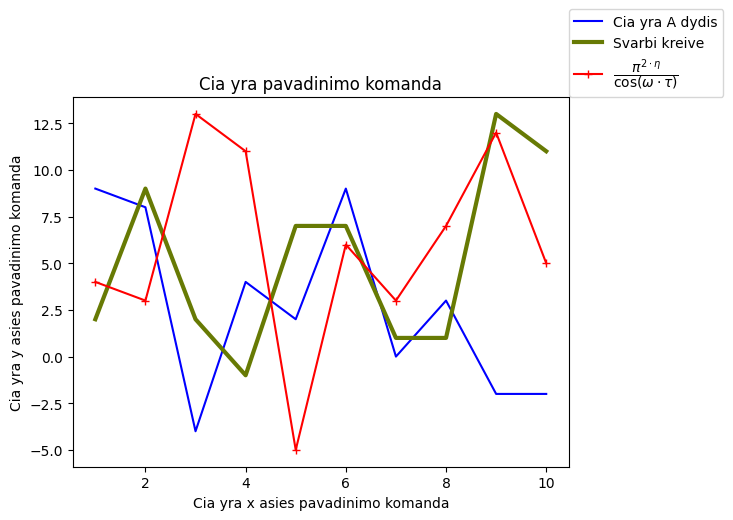

In [177]:
# pls.subplots():
a = np.arange(1,11)
b = np.random.randint(-5,15,10)
c = np.random.randint(-5,15,10)
d = np.random.randint(-5,15,10)
langas, grafikas = plt.subplots()     #(1,2, figsize=[8,4.5]) #16:9
# .plot() metodas: - taikomas konkreciam grafikui/norint nubraizyti grafika
grafikas.plot(a,b, label = 'Cia yra A dydis', linestyle="-", color='blue')
grafikas.plot(a,c, label = 'Svarbi kreive', linewidth=3, color='xkcd:olive green')
grafikas.plot(a,d, label = r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$', marker='+', color ='red')

grafikas.set_xlabel('Cia yra x asies pavadinimo komanda')
grafikas.set_ylabel('Cia yra y asies pavadinimo komanda')
grafikas.set_title('Cia yra pavadinimo komanda')
grafikas.legend(loc=[1,1])

# loc gali buti: 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

plt.show()

# https://matplotlib.org/stable/api/markers_api.html
# https://xkcd.com/color/rgb/

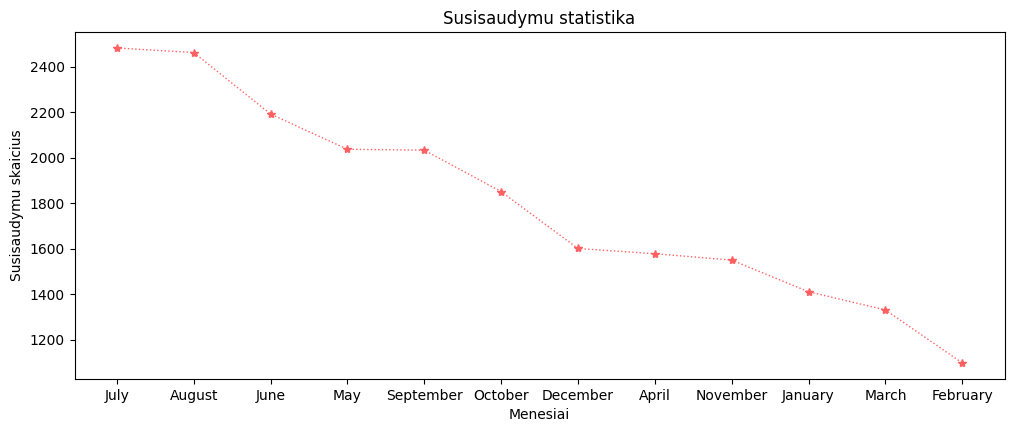

In [209]:
# turite nypd susisauddymu duomenis
# nubraizykite vizuolizacija, naudodami ka tik poateikta pavyzdi (su plot),
# kad matytumete, kuri menesi yra daugiausiai, maziausiai uzfiksuotu susisaudymu
# sudekite prasmingus asiu pavadinimus
nypd_small['MonthNr'].value_counts().sort_index(ascending=True)

a = months
b = counts
langas, grafikas = plt.subplots(figsize =[12,4.5])

grafikas.plot(a,b, linestyle=':', color='#ff6163', linewidth=1, marker='*')
grafikas.set_xlabel('Menesiai')
grafikas.set_ylabel('Susisaudymu skaicius')
grafikas.set_title('Susisaudymu statistika')

plt.show()

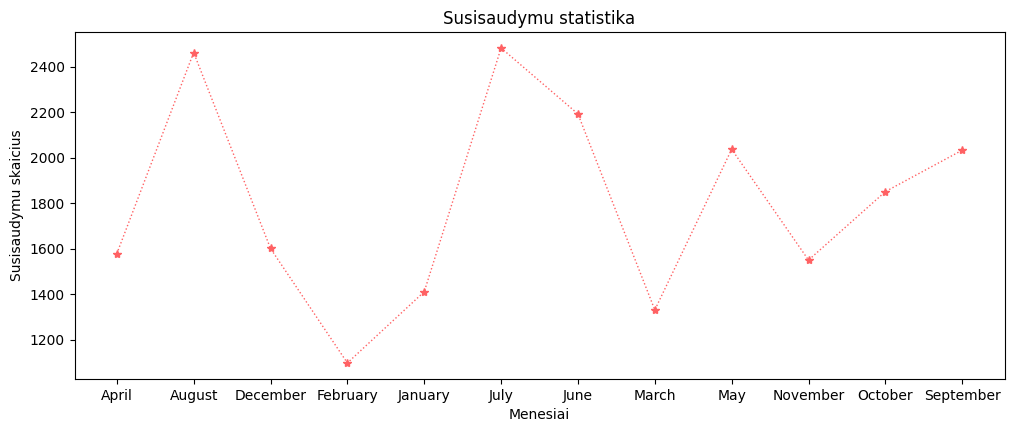

In [213]:
# turite nypd susisauddymu duomenis
# nubraizykite vizuolizacija, naudodami ka tik poateikta pavyzdi (su plot),
# kad matytumete, kuri menesi yra daugiausiai, maziausiai uzfiksuotu susisaudymu
# sudekite prasmingus asiu pavadinimus
men = nypd_small['MthName'].value_counts().sort_index(ascending=True).index
sk = nypd_small['MthName'].value_counts().sort_index(ascending=True).values

a = men
b = sk
langas, grafikas = plt.subplots(figsize =[12,4.5])

grafikas.plot(a,b, linestyle=':', color='#ff6163', linewidth=1, marker='*')
grafikas.set_xlabel('Menesiai')
grafikas.set_ylabel('Susisaudymu skaicius')
grafikas.set_title('Susisaudymu statistika')

plt.show()

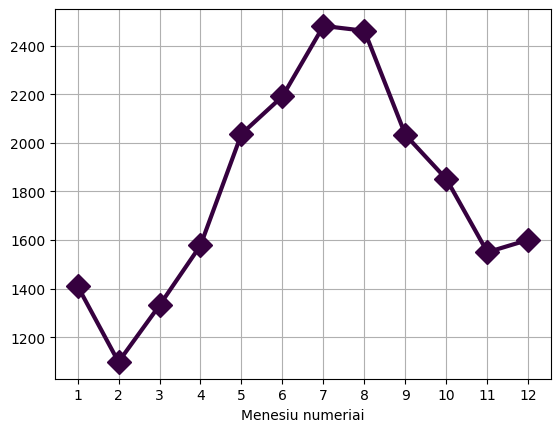

In [227]:
months_counts = nypd_small['MonthNr'].value_counts().sort_index(ascending=True)
months = months_counts.index
counts = months_counts.values

fig, ax = plt.subplots()
ax.plot(months, counts, lw=3, c='xkcd:deep purple', marker='D', ms=12)

ax.set_xticks(months) #x asies norimu skaiciu palikimas
ax.set_xlabel('Menesiu numeriai')
ax.grid() #tinklelio uzdejimas
# ax.set_xlim(-5,15) #galima keisti x asies ribas

plt.show()

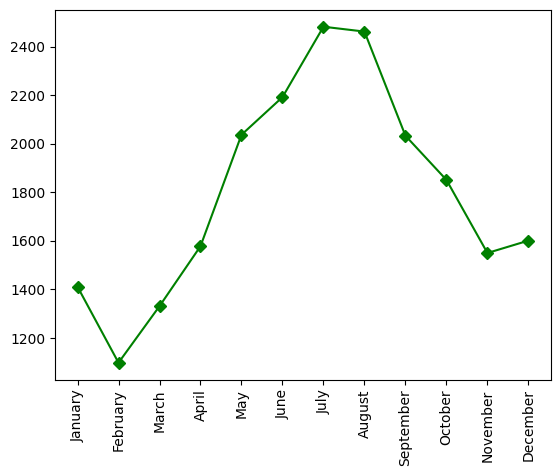

In [234]:
months = nypd_small[['MthName', 'MonthNr']].value_counts().reset_index().sort_values(by='MonthNr')
fig, ax = plt.subplots()

mnames = months['MthName'].values
mnumbers = months['MonthNr']
counts = months['count'].values

ax.plot(mnumbers, counts, marker='D', c='green')
ax.set_xticks(mnumbers)
ax.set_xticklabels(mnames, rotation=90)

plt.show()

In [232]:
nypd_small[['MthName', 'MonthNr']].value_counts().reset_index()

,MthName,MonthNr,count
0,July,7,2482
1,August,8,2462
2,June,6,2192
3,May,5,2037
4,September,9,2033
5,October,10,1851
6,December,12,1601
7,April,4,1578
8,November,11,1550
9,January,1,1411


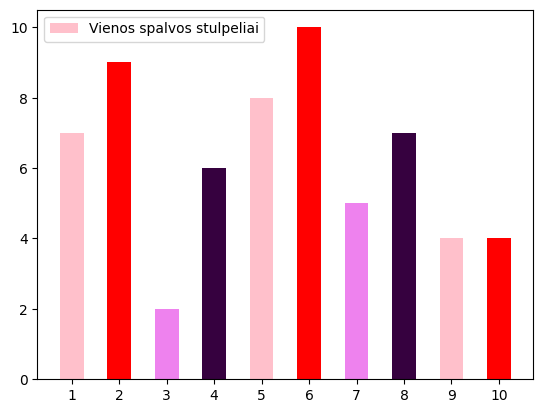

In [262]:
#  bar grafikai:
a = np.arange(1,11)
b = np.random.randint(1,11,10)
color_list = ['pink','red','violet','xkcd:deep purple']
fig, ax = plt.subplots()

ax.bar(a,b, color =color_list, width=0.5, label = 'Vienos spalvos stulpeliai')
ax.legend(loc='best')
ax.set_xticks(a) #paliekami tik tie dydziai, kurie yra isvardinti a funkcijoje

plt.show()

In [3]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
# import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\Gabri\OneDrive\Stalinis kompiuteris\python uzduotys\JupyterNotebooks\JupyterNotebooks


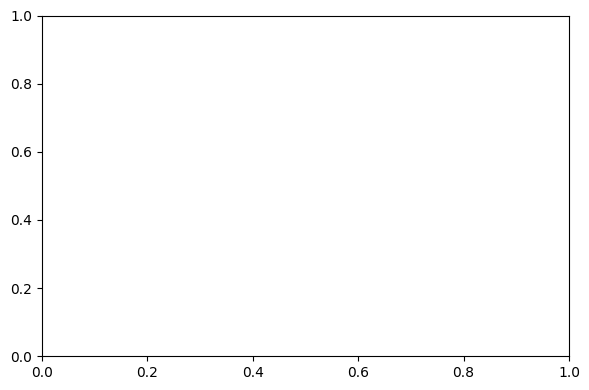

In [4]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

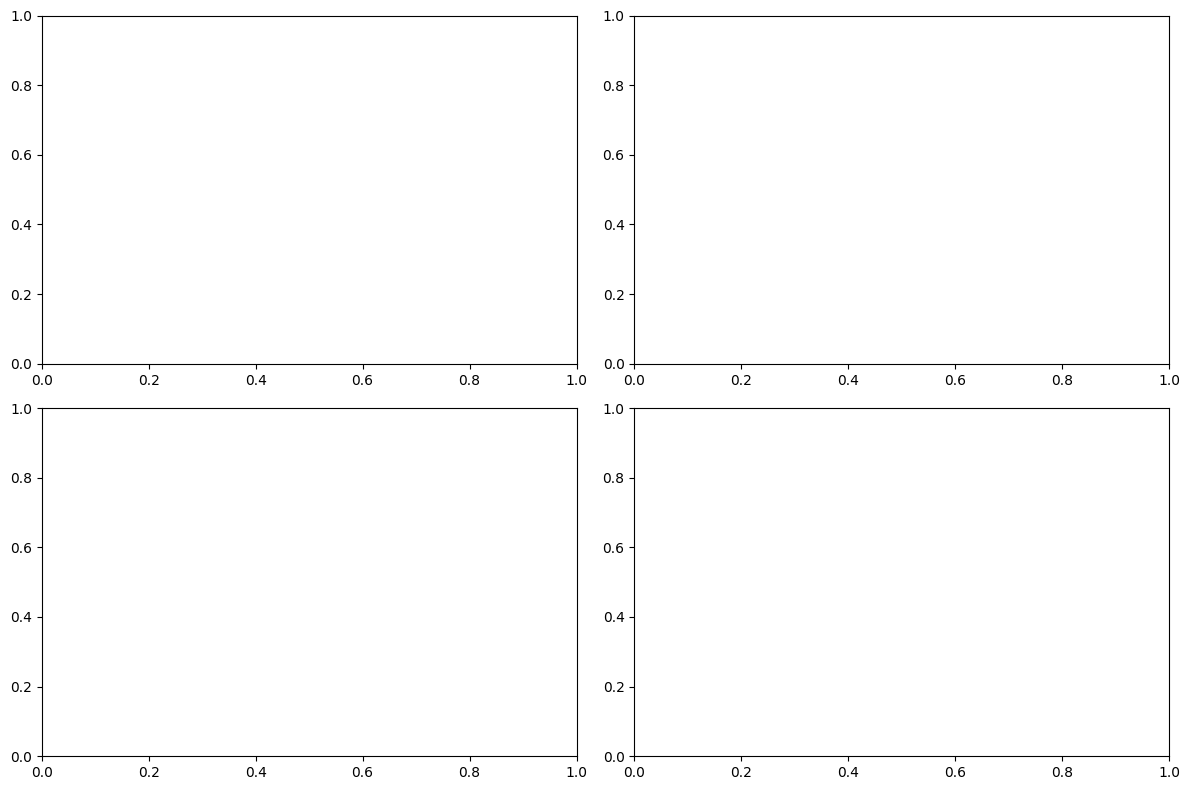

In [5]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(fwidth*2,fheight*2), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})
#ax1:
#plotting code:


#ax1.legend(loc='best')
#ax2:
#plotting code:


#ax2.legend(loc='best')
#ax3:
#plotting code:


#ax3.legend(loc='best')
#ax4:
#plotting code:


#ax4.legend(loc='best')
fig.tight_layout()
plt.show()

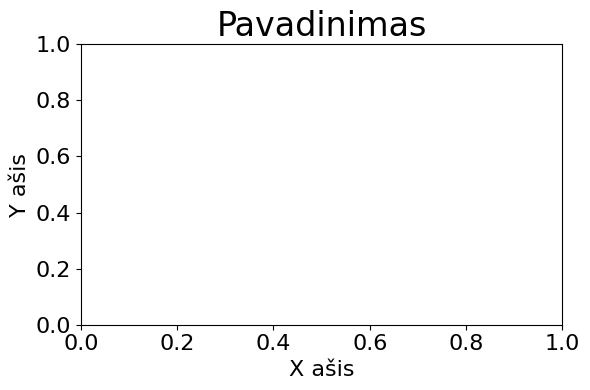

In [6]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


axis.set_xlabel('X ašis', fontsize=fontsize)
axis.set_ylabel('Y ašis', fontsize=fontsize)
axis.set_title('Pavadinimas', fontsize=titlesize)
axis.tick_params(axis='x', labelsize=labelsize)
axis.tick_params(axis='y', labelsize=labelsize)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
# :imp -importavimui
# :sfig - vienam grafikui
# :fig - 1nm grafikui su daugiau kodo